In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import catboost as cat_
import seaborn as sns
import lightgbm as lgb
import random

In [2]:
sub = pd.read_csv('C:\\Users\\WINSOME\\loan dataset\\SampleSubmission.csv')
train  = pd.read_csv('C:\\Users\\WINSOME\\loan dataset\\train.csv')
test  = pd.read_csv('C:\\Users\\WINSOME\\loan dataset\\test.csv')

In [3]:
hold = test.Applicant_ID

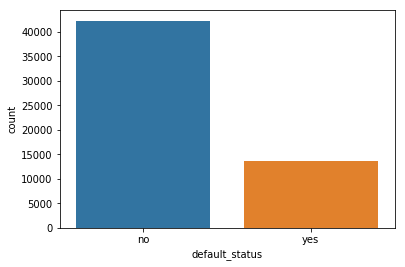

In [4]:
sns.countplot(train.default_status)

In [5]:
train.isna().sum()/train.shape[0]

Applicant_ID      0.000000
form_field1       0.045161
form_field2       0.068643
form_field3       0.006339
form_field4       0.006339
form_field5       0.006339
form_field6       0.238571
form_field7       0.092196
form_field8       0.238571
form_field9       0.143000
form_field10      0.006339
form_field11      0.561089
form_field12      0.176696
form_field13      0.105161
form_field14      0.000000
form_field15      0.401339
form_field16      0.232786
form_field17      0.199125
form_field18      0.185750
form_field19      0.000071
form_field20      0.006339
form_field21      0.283107
form_field22      0.364286
form_field23      0.502196
form_field24      0.237446
form_field25      0.097321
form_field26      0.132821
form_field27      0.166054
form_field28      0.006339
form_field29      0.006339
form_field30      0.455518
form_field31      0.703714
form_field32      0.097321
form_field33      0.022429
form_field34      0.006339
form_field35      0.413357
form_field36      0.035625
f

In [6]:
changing= {'charge':0,'lending':1}

train['form_field47'].replace(changing, inplace = True)
test['form_field47'].replace(changing, inplace = True)

In [7]:
change= {'no':0,'yes':1}
train['default_status'].replace(change, inplace = True)

In [8]:
data= train.append(test)[train.columns]

In [9]:
train = data[data.default_status.notna()]
test = data[data.default_status.isna()].drop('default_status', 1)

In [10]:
train.shape, test.shape

((56000, 52), (24000, 51))

In [11]:
train['default_status'].value_counts()/len(train)*100

0.0    75.508929
1.0    24.491071
Name: default_status, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss

In [13]:
def crossVal(model):
    avg = 0
    for fold, (tr, te) in enumerate(skfolds.split(xtrainval, ytrainval), 1):
        train_x, test_x = xtrainval.iloc[tr], xtrainval.iloc[te]
        train_y, test_y = ytrainval.iloc[tr], ytrainval.iloc[te]
        
        model.fit(train_x, train_y, eval_set=[(train_x, train_y), (test_x, test_y)], 
                  early_stopping_rounds=200, verbose=False)
        preds = model.predict_proba(test_x)[:,1]
        logloss = log_loss(test_y, preds)
        print(f'Fold {fold}: Logloss: {logloss}')
        avg += logloss
    free = gc.collect()
    print(f'Avg Logloss: {avg/fold}')

In [14]:
def crossValPred(model):
    avg = 0
    test_scores = []
    for fold, (tr, te) in enumerate(skfolds.split(X, y), 1):
        train_x, test_x = X.iloc[tr], X.iloc[te]
        train_y, test_y = y.iloc[tr], y.iloc[te]
        
        model.fit(train_x, train_y, eval_set=[(train_x, train_y), (test_x, test_y)], 
                  early_stopping_rounds=200, verbose=False)
        
        preds = model.predict_proba(test_x)[:, 1]
        logloss = log_loss(test_y, preds)
        print(f'Fold {fold}: Logloss: {logloss}')
        avg += logloss
        
        
        test_pred = model.predict_proba(test_c)[:,1]
        test_scores.append(test_pred)
    print(f'Avg Logloss: {avg/fold}')
    free = gc.collect()
    return np.mean(test_scores, 0)

In [15]:
seed = 1994
random.seed(seed)
np.random.seed(seed)

In [16]:
cat_cols = train.select_dtypes('object').columns.drop(['Applicant_ID'], 1)

In [17]:
train.fillna(-999, inplace=True)
test.fillna(-999, inplace=True)

C:\Users\WINSOME\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [18]:
%matplotlib inline
pd.set_option('display.max_columns', 150)
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.size'] = 12
pd.set_option('display.max_colwidth', 2000)

In [19]:
def plot_graph(model, xtr, ytr, ax=None):
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    plot_confusion_matrix(model, xtr, ytr, ax=ax[0])
    ax[0].grid(False)
    plot_roc_curve(model, xtr, ytr, ax=ax[1])

In [20]:
skfolds= StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [22]:
train.drop(['form_field48', 'form_field49'], axis = 1, inplace = True)
test.drop(['form_field48', 'form_field49'], axis = 1, inplace = True)

C:\Users\WINSOME\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
X = train.drop(['default_status', 'Applicant_ID'], axis = 1)
y = train['default_status']
test_c = test.drop(['Applicant_ID'], 1)

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [25]:
xtrainval, xtest, ytrainval, ytest = train_test_split(X, y, test_size=0.18, stratify=y, random_state=seed)
xtrain, xval, ytrain, yval = train_test_split(xtrainval, ytrainval, test_size=0.20, stratify=ytrainval, random_state=seed)

In [26]:
catboost = cat_.CatBoostClassifier(random_seed=seed, cat_features=cat_cols, bootstrap_type='Bernoulli', 
                              iterations=1000, silent=True, eval_metric='Logloss')

In [27]:
%%time
catboost.fit(xtrain, ytrain, eval_set=[(xval,yval)], early_stopping_rounds=350, verbose=200);

Learning rate set to 0.077177
0:	learn: 0.6454188	test: 0.6455007	best: 0.6455007 (0)	total: 286ms	remaining: 4m 45s
200:	learn: 0.3818579	test: 0.4073620	best: 0.4073620 (200)	total: 11.8s	remaining: 46.8s
400:	learn: 0.3525390	test: 0.4065132	best: 0.4062084 (323)	total: 23.2s	remaining: 34.7s
600:	learn: 0.3288724	test: 0.4081176	best: 0.4062084 (323)	total: 36.4s	remaining: 24.1s
Stopped by overfitting detector  (350 iterations wait)

bestTest = 0.4062084327
bestIteration = 323

Shrink model to first 324 iterations.
Wall time: 41.8 s


In [28]:
import os, gc, warnings
warnings.filterwarnings('ignore')

In [29]:
crossVal(catboost)

Fold 1: Logloss: 0.41259944670660764
Fold 2: Logloss: 0.40430564201016306
Fold 3: Logloss: 0.4087375436626895
Fold 4: Logloss: 0.4053728527315728
Fold 5: Logloss: 0.40361400810985937
Avg Logloss: 0.4069258986441785


In [30]:
catpred = crossValPred(catboost)

Fold 1: Logloss: 0.40380363053915413
Fold 2: Logloss: 0.4140782915749684
Fold 3: Logloss: 0.4114149104103545
Fold 4: Logloss: 0.40136130654204716
Fold 5: Logloss: 0.40187849233041856
Avg Logloss: 0.4065073262793885


In [31]:
X[cat_cols] = X[cat_cols].astype('category')
test_c[cat_cols] = test_c[cat_cols].astype('category')

In [32]:
xtrainval, xtest, ytrainval, ytest = train_test_split(X, y, test_size=0.18, stratify=y, random_state=seed)
xtrain, xval, ytrain, yval = train_test_split(xtrainval, ytrainval, test_size=0.20, stratify=ytrainval, random_state=seed)

In [33]:
lgbm = lgb.LGBMClassifier(random_state=seed, n_estimators=1000, metric='binary_logloss', learning_rate=0.04, subsample=0.7,
                         colsample_bytree=0.8, num_leaves=64, reg_alpha=4, min_child_samples=5,subsample_freq=2)

In [34]:
lgbm.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xval,yval)], verbose=200, early_stopping_rounds=200);

Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.332239	valid_1's binary_logloss: 0.410527
[400]	training's binary_logloss: 0.280055	valid_1's binary_logloss: 0.41306
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.313815	valid_1's binary_logloss: 0.410359


In [35]:
crossVal(lgbm)

Fold 1: Logloss: 0.4129744141503213
Fold 2: Logloss: 0.4053998619063808
Fold 3: Logloss: 0.41186173521509317
Fold 4: Logloss: 0.40608642443007215
Fold 5: Logloss: 0.40388461691767746
Avg Logloss: 0.40804141052390897


In [36]:
lgb_pred = crossValPred(lgbm)

Fold 1: Logloss: 0.4036112103672774
Fold 2: Logloss: 0.4136446358502129
Fold 3: Logloss: 0.409634335950567
Fold 4: Logloss: 0.4024076953754972
Fold 5: Logloss: 0.40427941023014285
Avg Logloss: 0.4067154575547394


In [37]:
blend = ((0.4 * lgb_pred + 0.6 * catpred) + (0.6 * lgb_pred + 0.4 * catpred))/2

In [41]:
dlgb =  pd.DataFrame({'Applicant_ID' : hold, 'default_status' : lgb_pred})
dcat =  pd.DataFrame({'Applicant_ID' : hold, 'default_status' : catpred})
pblend =  pd.DataFrame({'Applicant_ID' : hold, 'default_status' : blend})

In [42]:
pd.DataFrame(np.c_[lgb_pred, catpred, blend], columns=['LGB', 'CAT', 'BLEND'])

,LGB,CAT,BLEND
0,0.280542,0.302969,0.291755
1,0.392058,0.400716,0.396387
2,0.409443,0.392604,0.401024
3,0.753498,0.736257,0.744877
4,0.141288,0.186834,0.164061
...,...,...,...
23995,0.734368,0.692921,0.713644
23996,0.243924,0.254136,0.249030
23997,0.233325,0.279037,0.256181
23998,0.514169,0.514363,0.514266


In [43]:
dlgb.to_csv ('C:\\Users\\WINSOME\\lgb2a.csv',index=False)
dcat.to_csv ('C:\\Users\\WINSOME\\cat2a.csv',index=False)
pblend.to_csv ('C:\\Users\\WINSOME\\pblend.csv',index=False)